<h3>Tools for handling outliers and overlapping in Classifications</h3>

In [14]:
# pandas module imported
# as well as seaborn and 
# matplotlib.pyplot modules
import pandas as pd

# boxplot version
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("car_purchasingNew.csv", encoding='ISO-8859-1')



In [15]:
df.head()

,customer name,JobTitle,customer e-mail,country,gender,age,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,credit card debt,net worth,car purchase amount
0,Martina Avila,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,42,167411.18,0.00,400184.25,NaN,567595.43,567595.43,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,CAPTAIN III (POLICE DEPARTMENT),eu.dolor@diam.co.uk,Belize,0,41,155966.02,245131.88,137811.38,NaN,538909.28,538909.28,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,CAPTAIN III (POLICE DEPARTMENT),vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43,212739.13,106088.18,16452.60,NaN,335279.91,335279.91,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,WIRE ROPE CABLE MAINTENANCE MECHANIC,malesuada@dignissim.com,Cook Islands,1,58,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,14426.164850,548599.0524,67422.36313
4,Cedric Leach,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57,134401.60,9737.00,182234.59,NaN,326373.19,326373.19,5358.712177,560304.0671,55915.46248


In [16]:
df.columns

Index(['customer name', 'JobTitle', 'customer e-mail', 'country', 'gender',
       'age', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay',
       'TotalPayBenefits', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [17]:
# the columns name were named
df.rename(columns={'customer name': 'customer_name', 
                   'customer e-mail': 'customer_email',
                     #'annual Salary': 'annual_Salary',
                       'credit card debt':'credit_card_debt', 'car purchase amount':'car_purchase_amount'}, inplace=True)

In [18]:
df.head()

,customer_name,JobTitle,customer_email,country,gender,age,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,credit_card_debt,net worth,car_purchase_amount
0,Martina Avila,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,42,167411.18,0.00,400184.25,NaN,567595.43,567595.43,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,CAPTAIN III (POLICE DEPARTMENT),eu.dolor@diam.co.uk,Belize,0,41,155966.02,245131.88,137811.38,NaN,538909.28,538909.28,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,CAPTAIN III (POLICE DEPARTMENT),vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43,212739.13,106088.18,16452.60,NaN,335279.91,335279.91,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,WIRE ROPE CABLE MAINTENANCE MECHANIC,malesuada@dignissim.com,Cook Islands,1,58,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,14426.164850,548599.0524,67422.36313
4,Cedric Leach,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57,134401.60,9737.00,182234.59,NaN,326373.19,326373.19,5358.712177,560304.0671,55915.46248


In [19]:
# here I did drop some of these variables
df = df.drop(['customer_name', 'JobTitle', 'customer_email', 'country', 'gender', 'Benefits'], axis=1)
 
# For the purpose of visualizations. its imperative binning creates a categorical variable
# as it is a continuous variable (car_purchase_amoun), making visualizations easy here
# And the bins create the car_purchase_amount into five categories

df = df.query('car_purchase_amount < car_purchase_amount.quantile(q=0.98)')

df['binned_car_purchase_amount'] = pd.cut(df['car_purchase_amount'], bins=5, labels=['Low', 'Below Average', 'Average', 'Above Average', 'High'])

In [20]:
df.columns

Index(['age', 'BasePay', 'OvertimePay', 'OtherPay', 'TotalPay',
       'TotalPayBenefits', 'credit_card_debt', 'net worth',
       'car_purchase_amount', 'binned_car_purchase_amount'],
      dtype='object')

In [21]:
# pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# the independent variables are listed below
# leave out the target variable! (dependent variable)
X = df[['age', 'BasePay', 'OvertimePay', 'OtherPay', 'TotalPay',
       'TotalPayBenefits', 'credit_card_debt', 'net worth']]

# have only the target variable here (dependent variable)
y = df['car_purchase_amount']

# VIF dataframe 
# VIF = Variance Inflation Factor
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  

# variables with high VIF-value 
# can mean multlicollinearity (variables providing same linear
# relationships in the data, potentially confusing the ML algorithm
# this might be good info when deciding if some variable needs to be removed
vif_data

c:\Users\User\AdvancedDataAnalytics2024AutumnNew2\AdvancedDataAnalytics2024AutumnNew\venv310\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,age,22.723186
1,BasePay,inf
2,OvertimePay,inf
3,OtherPay,inf
4,TotalPay,inf
5,TotalPayBenefits,inf
6,credit_card_debt,8.039532
7,net worth,6.863231


In [22]:
df.head()

,age,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,credit_card_debt,net worth,car_purchase_amount,binned_car_purchase_amount
0,42,167411.18,0.00,400184.25,567595.43,567595.43,11609.380910,238961.2505,35321.45877,Average
1,41,155966.02,245131.88,137811.38,538909.28,538909.28,9572.957136,530973.9078,45115.52566,Above Average
2,43,212739.13,106088.18,16452.60,335279.91,335279.91,11160.355060,638467.1773,42925.70921,Average
4,57,134401.60,9737.00,182234.59,326373.19,326373.19,5358.712177,560304.0671,55915.46248,High
5,57,118602.00,8601.00,189082.74,316285.74,316285.74,14179.472440,428485.3604,56611.99784,High


<Axes: xlabel='age', ylabel='car_purchase_amount'>

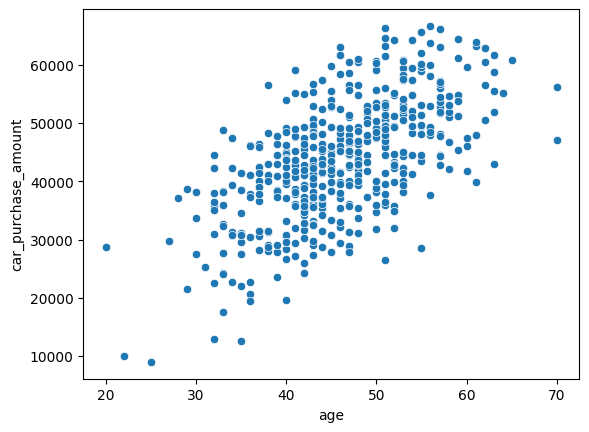

In [23]:
# checking the outliers for most purchased and car_purchase_aamount
sns.scatterplot(data=df, x="age", y="car_purchase_amount")

C:\Users\User\AppData\Local\Temp\ipykernel_22064\3057594446.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='binned_car_purchase_amount', y='credit_card_debt', data=df, palette='coolwarm')


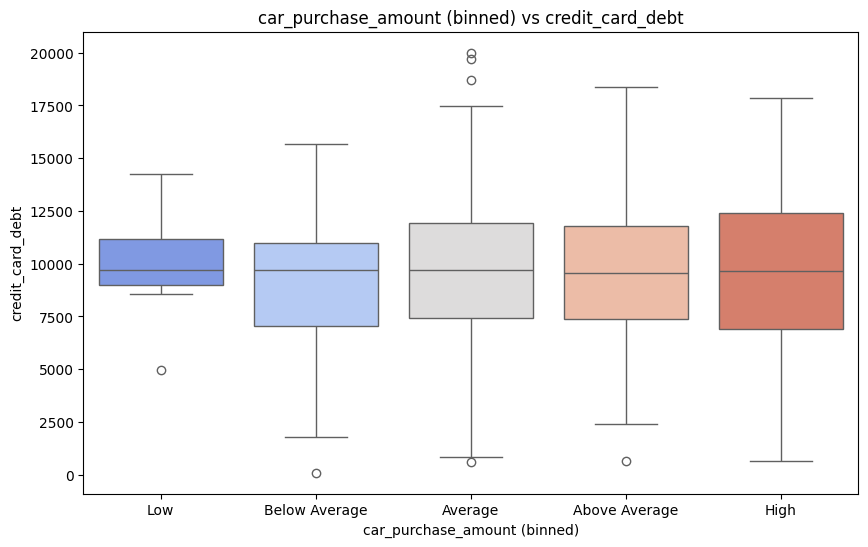

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='binned_car_purchase_amount', y='credit_card_debt', data=df, palette='coolwarm')
plt.title('car_purchase_amount (binned) vs credit_card_debt')
plt.xlabel('car_purchase_amount (binned)')
plt.ylabel('credit_card_debt')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_22064\2503890177.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='binned_car_purchase_amount', y='TotalPayBenefits', data=df, palette='coolwarm')


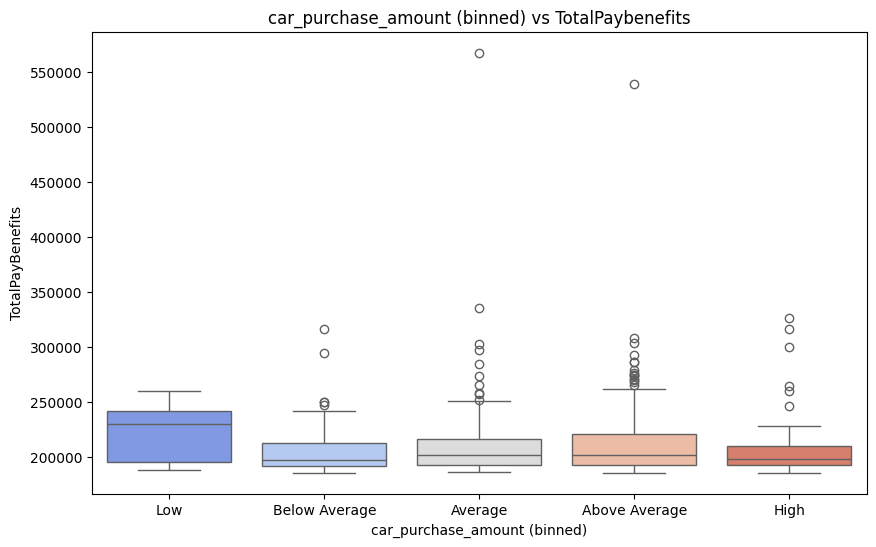

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='binned_car_purchase_amount', y='TotalPayBenefits', data=df, palette='coolwarm')
plt.title('car_purchase_amount (binned) vs TotalPaybenefits')
plt.xlabel('car_purchase_amount (binned)')
plt.ylabel('TotalPayBenefits')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_22064\828289910.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='binned_car_purchase_amount', y='net worth', data=df, palette='coolwarm')


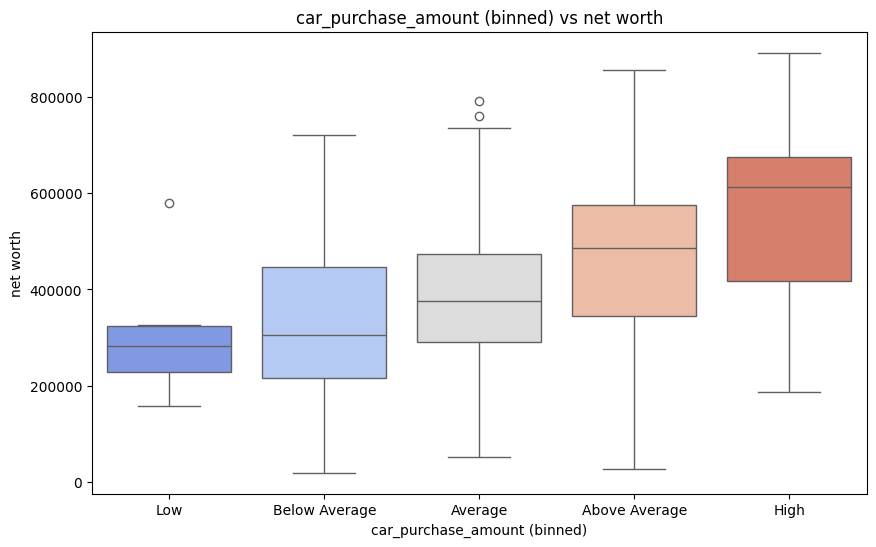

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='binned_car_purchase_amount', y='net worth', data=df, palette='coolwarm')
plt.title('car_purchase_amount (binned) vs net worth')
plt.xlabel('car_purchase_amount (binned)')
plt.ylabel('net worth')
plt.show()

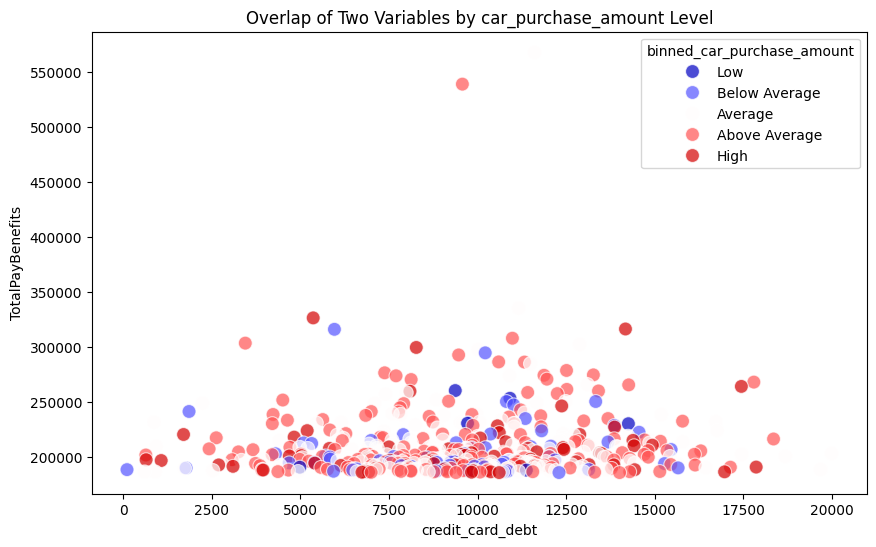

In [39]:
# Plot setup
plt.figure(figsize=(10, 6))
sns.scatterplot(x='credit_card_debt', y='TotalPayBenefits', hue='binned_car_purchase_amount', data=df, palette='seismic', s=100, alpha=0.7)

# Add title and labels
plt.title('Overlap of Two Variables by car_purchase_amount Level')
plt.xlabel('credit_card_debt')
plt.ylabel('TotalPayBenefits')

# Display the plot
plt.show()

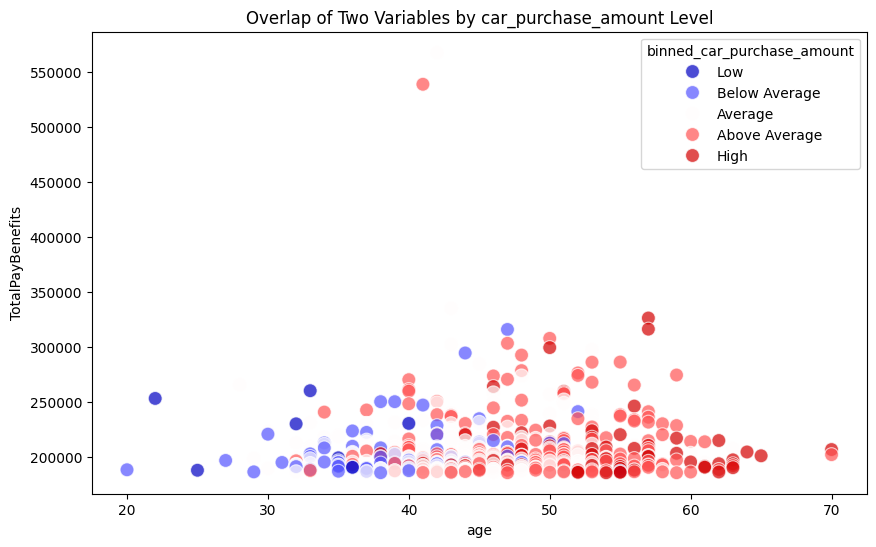

In [40]:
# Plot setup
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='TotalPayBenefits', hue='binned_car_purchase_amount', data=df, palette='seismic', s=100, alpha=0.7)

# Add title and labels
plt.title('Overlap of Two Variables by car_purchase_amount Level')
plt.xlabel('age')
plt.ylabel('TotalPayBenefits')

# Display the plot
plt.show()

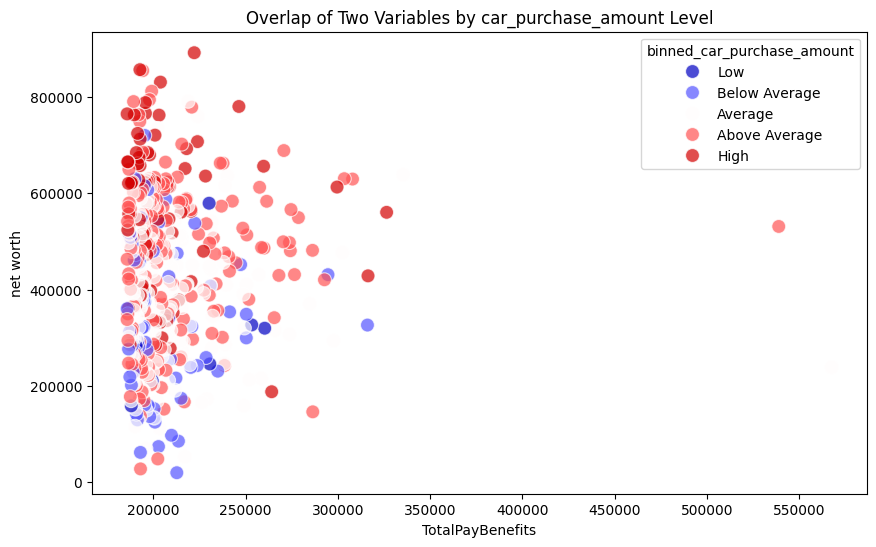

In [41]:
# Plot setup
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalPayBenefits', y='net worth', hue='binned_car_purchase_amount', data=df, palette='seismic', s=100, alpha=0.7)

# Add title and labels
plt.title('Overlap of Two Variables by car_purchase_amount Level')
plt.xlabel('TotalPayBenefits')
plt.ylabel('net worth')

# Display the plot
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_22064\1633902750.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="binned_car_purchase_amount", y='OtherPay', data=df, palette='seismic')


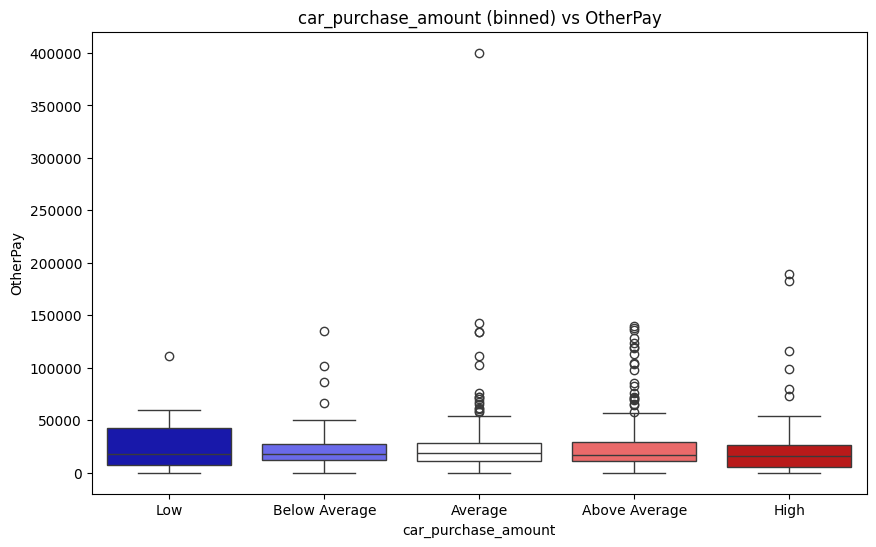

In [42]:
# This plot is between two variables
plt.figure(figsize=(10, 6))
sns.boxplot(x="binned_car_purchase_amount", y='OtherPay', data=df, palette='seismic')
plt.title('car_purchase_amount (binned) vs OtherPay')
plt.xlabel('car_purchase_amount')
plt.ylabel('OtherPay')
plt.show()